<a href="https://colab.research.google.com/github/boykeu/dataset/blob/master/codex_hc_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problems Statement

### Perusahaan X yang bergerak di produk digital, sedang berfokus pada pengelolaan talent nya. Manager HR merekrut Anda selaku Data Scientist untuk membantu dalam melihat kondisi talent perusahaan X berdasarkan data.



---


#### Fakta yang ada:

##### a. Untuk mengurangi cost dalam rekrutmen, Perusahaan X berupaya mempertahankan talent eksisting.

##### b. Sudah dilakukan pengukuran performansi, employee satisfaction dan employee engagement namun belum ada tindak lanjut dari hasil pengukuran. 



---



## Tugas Anda:

##### 1. Berikan insight ke Management terkait kondisi talent di perusahaan X dengan visualisasi profil talent (dalam bentuk ppt/ Tableau/ Power BI/ Google Data Studio atau platform visualisasi lainnya)

##### 2. Buatlah dalam bentuk Power Point dengan rincian minimal terdapat rumusan masalah, metodologi, analisis, rekomendasi dan link git model dari masalah:

##### Bagaimana memprediksi talent yang berpotensi akan terminate (resign, performansi rendah dan lainnya)?



#### Diperbolehkan menambahkan asumsi dan data lainnya di luar dataset untuk mempertajam analisis (jika dibutuhkan).


###### Dataset dapat diunduh melalui http://bit.ly/datasethrcodex

# Import Dataset

In [1]:
# Our principal libraries

import numpy as np
import pandas as pd

In [2]:
from google.colab import files
file_upload = files.upload()

# Read and Transform dataset

In [4]:
import datetime as dt
from io import StringIO

df = pd.read_csv('dataset HR analytics.csv')

now = pd.Timestamp('now')

df['DOB'] = pd.to_datetime(df['DOB'])
df['DOB'] = df['DOB'].where(df['DOB'] < now, df['DOB'] -  np.timedelta64(100, 'Y')) 
df['years_emp_age'] = (now - df['DOB']).astype('<m8[Y]') 

df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofHire'] = df['DateofHire'].where(df['DateofHire'] < now, df['DateofHire'] -  np.timedelta64(100, 'Y')) 
df['years_of_service'] = (now - df['DateofHire']).astype('<m8[Y]') 

# Create target field 'isAttrition'
df = df.assign(isAttrition=np.where(df['DateofTermination'].isnull(), False, True))

# Remove unused columns
df.drop(['Employee_Name', 'EmpID', 'DateofTermination', 'EmploymentStatus', 'LastPerformanceReview_Date', 'DOB', 'DateofHire', 'TermReason'], axis='columns', inplace=True)

'''
'Employee_Name'
'EmpID'
'DateofTermination'
'EmploymentStatus'
'LastPerformanceReview_Date'
'DOB'
'DateofHire'
'TermReason'
'''
df.head(10)

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,RaceDesc,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,years_emp_age,years_of_service,isAttrition
0,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Exceed,EWD,Evaluate,Sunda,LinkedIn,4.60,5,0,0,1,37.0,9.0,False
1,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,Pay,Sunda,Indeed,4.96,3,6,0,17,46.0,6.0,True
2,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,Jawa,LinkedIn,3.02,3,0,0,3,32.0,9.0,True
3,Not married,Single,F,TKP/ Outsource,Business Analyst,Middle,Exceed,ENT,Intermoda,Cina,Indeed,4.84,5,0,0,15,32.0,13.0,False
4,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,Bali,Google Search,5.00,4,0,0,2,31.0,9.0,True
5,Married,Married,F,TKP/ Outsource,Product Owner,Senior,Exceed,COM,ChatAja,Bali,LinkedIn,5.00,5,0,0,15,44.0,9.0,False
6,Married,Married,F,TKP/ Outsource,Business Analyst,Junior,Average,COM,Vutura,Padang,LinkedIn,3.04,3,4,0,19,42.0,6.0,False
7,Married,Divorced,M,TKP/ Outsource,Business Analyst,Junior,Exceed,ENT,Intermoda,Jawa,Employee Referral,5.00,4,0,0,19,38.0,7.0,False
8,Not married,Single,F,TKP/ Outsource,Business Analyst,Middle,Exceed,EWD,Sales Cycle,Sunda,Diversity Job Fair,4.46,3,0,0,4,51.0,11.0,False
9,Married,Widowed,M,TKP/ Outsource,Product Owner,Middle,Need improvement,EWD,Activate & Install,Cina,Indeed,5.00,5,6,0,16,33.0,6.0,False


In [5]:
# Transform the data (Non-numerical ---> Numerical)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_transform = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df_transform

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,RaceDesc,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,years_emp_age,years_of_service,isAttrition
0,1,2,1,2,8,2,1,4,11,4,5,90,4,0,0,0,9,11,0
1,1,2,1,2,8,2,2,4,35,4,4,109,2,6,0,8,18,8,1
2,0,0,0,2,8,2,0,3,17,2,5,17,2,0,0,13,4,11,1
3,1,2,0,2,2,1,1,3,24,1,4,105,4,0,0,6,4,3,0
4,1,2,0,1,2,1,0,2,54,0,3,110,3,0,0,11,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1,2,1,2,1,1,2,2,52,3,4,65,2,0,0,16,25,4,0
283,0,3,0,2,1,0,0,9,26,0,5,12,4,0,4,9,10,9,0
284,1,2,1,2,5,0,1,2,53,1,0,110,2,5,0,2,5,8,1
285,0,1,1,2,1,0,1,2,53,0,1,90,2,4,0,19,9,10,1


In [ ]:
# print all of the data types and their unique value counts

for column in df_transform.columns:
  print(str(column) + ' : ' + str(df_transform[column].unique()))
  print(df_transform[column].value_counts())
  print('___________________________________________________________________________')

# Feature extraction and Engineering

In [6]:
df.shape

(287, 19)

In [7]:
df.describe()

,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,years_emp_age,years_of_service
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,4.112300,3.895470,1.181185,0.411150,10.191638,41.780488,7.836237
std,0.794004,0.910053,2.290585,1.273018,5.930383,8.863213,1.983589
min,1.120000,1.000000,0.000000,0.000000,1.000000,28.000000,2.000000
25%,3.700000,3.000000,0.000000,0.000000,5.000000,34.000000,6.000000
50%,4.280000,4.000000,0.000000,0.000000,10.000000,40.000000,8.000000
75%,4.700000,5.000000,0.000000,0.000000,15.000000,47.000000,9.000000
max,5.000000,5.000000,8.000000,6.000000,20.000000,70.000000,15.000000


In [8]:
# Print Between Column Correlation    
print(df_transform.corr())

                      MarriedID  MaritalStatusID  ...  years_of_service  isAttrition
MarriedID              1.000000         0.342306  ...          0.019543    -0.026038
MaritalStatusID        0.342306         1.000000  ...          0.098556    -0.038568
GenderID               0.108124        -0.001677  ...          0.020672    -0.017752
EmpStatusID           -0.032676        -0.019794  ...          0.064365    -0.048033
RoleID                -0.032959         0.062671  ...          0.013754     0.001241
LevelID                0.045130        -0.042159  ...          0.075467    -0.046901
PerfScoreID            0.028791         0.033625  ...         -0.060798    -0.011088
Tribe                  0.073576         0.094981  ...          0.011241    -0.065848
Squad                  0.112249         0.054944  ...         -0.032706     0.134938
RaceDesc               0.074509        -0.009614  ...         -0.011911    -0.031758
RecruitmentSource     -0.027887         0.097670  ...          0.

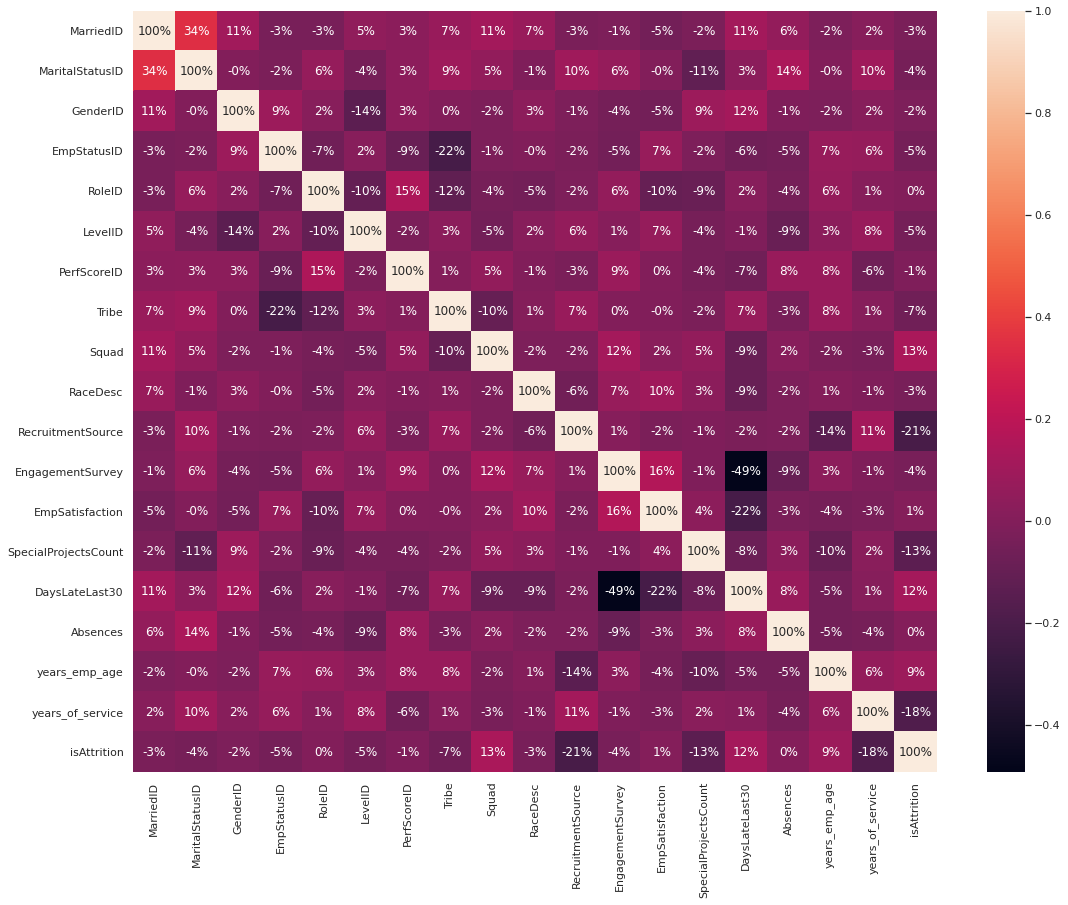

In [9]:
import seaborn as sns

# Visualize correlation
sns.set(rc={'figure.figsize':(18,14)})
sns.heatmap(df_transform.corr(), annot=True, fmt='.0%')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


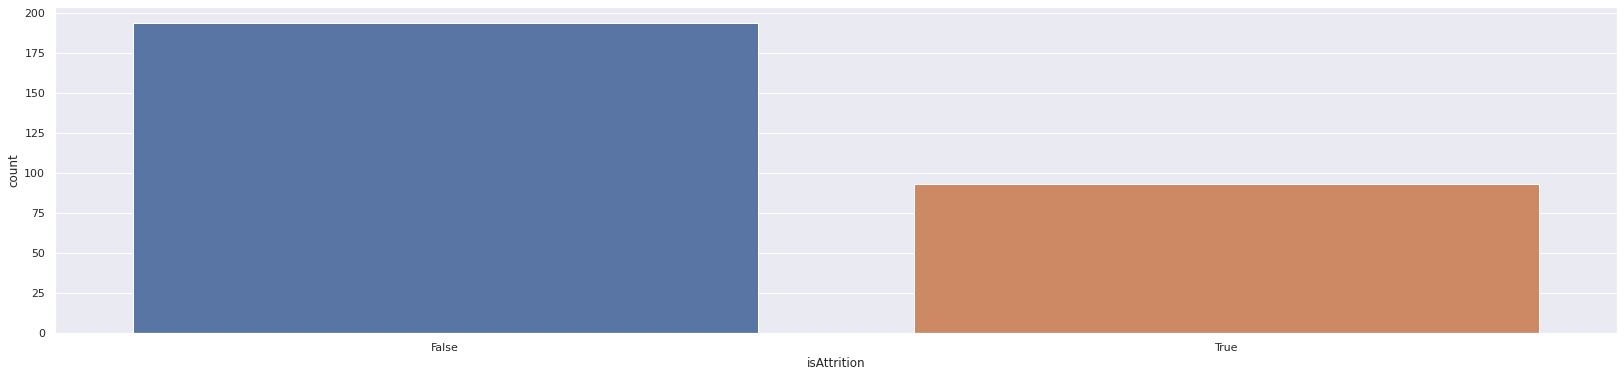

In [10]:
sns.set(rc={'figure.figsize':(28, 6)})

sns.countplot(df['isAttrition'])

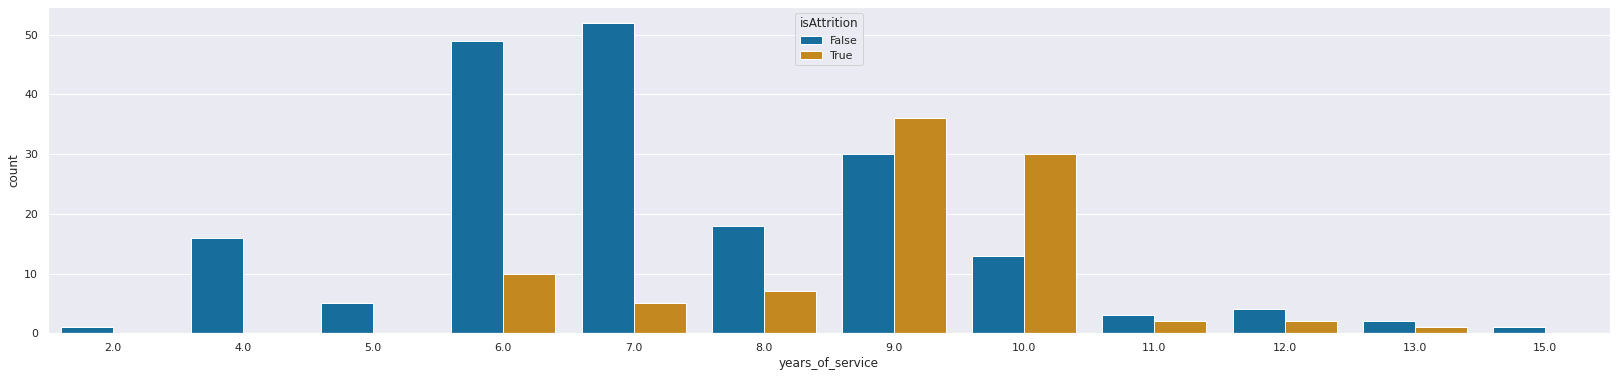

In [13]:
# Count no of employees that left and stayed by squad
sns.countplot(x = 'years_of_service', hue = 'isAttrition', data = df, palette = 'colorblind')

In [14]:
# Split label data

X = df_transform.loc[ : , df_transform.columns != 'isAttrition'].values
Y = df_transform['isAttrition'].values

# Split into training n test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

In [15]:
X

array([[ 1,  2,  1, ...,  0,  9, 11],
       [ 1,  2,  1, ...,  8, 18,  8],
       [ 0,  0,  0, ..., 13,  4, 11],
       ...,
       [ 1,  2,  1, ...,  2,  5,  8],
       [ 0,  1,  1, ..., 19,  9, 10],
       [ 1,  2,  0, ..., 15,  8,  0]])

In [16]:
Y

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1])

# Model build and deployment

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)

# Deploy train data and get score
forest.fit(X_train, Y_train)
forest.score(X_train, Y_train)

1.0

In [18]:
# show confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print(f'Model testing aaccuracy = {(TP+TN) / (TP+TN+FN+FP)}')

[[49  3]
 [16  4]]
Model testing aaccuracy = 0.7361111111111112


Feature: 0, Score: 0.01616
Feature: 1, Score: 0.03766
Feature: 2, Score: 0.01894
Feature: 3, Score: 0.01875
Feature: 4, Score: 0.04879
Feature: 5, Score: 0.03491
Feature: 6, Score: 0.04248
Feature: 7, Score: 0.06200
Feature: 8, Score: 0.09813
Feature: 9, Score: 0.04292
Feature: 10, Score: 0.07416
Feature: 11, Score: 0.08324
Feature: 12, Score: 0.03029
Feature: 13, Score: 0.04414
Feature: 14, Score: 0.01849
Feature: 15, Score: 0.07472
Feature: 16, Score: 0.09285
Feature: 17, Score: 0.16136


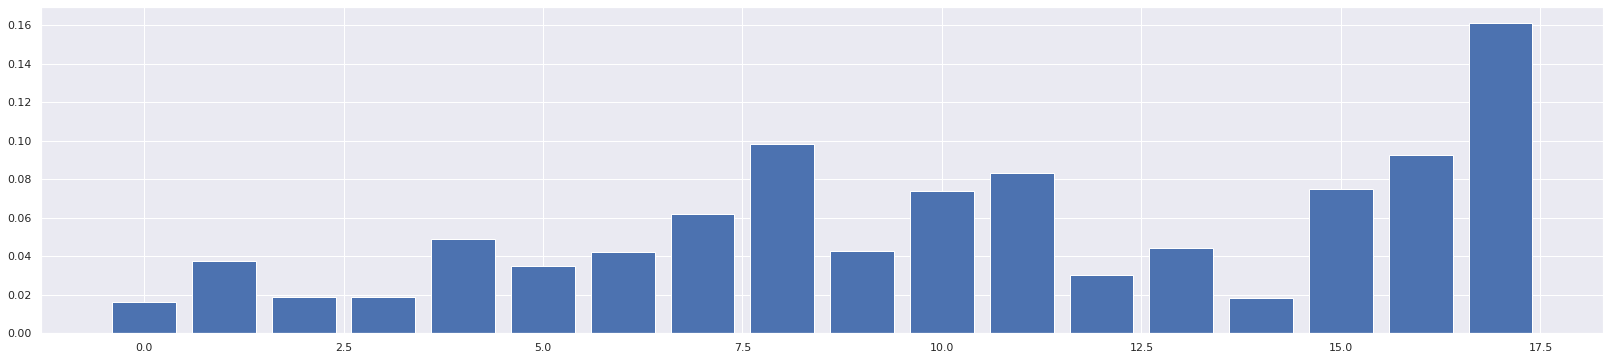

In [19]:
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

from matplotlib import pyplot

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
# Deploy train data and get score
tree.fit(X_train, Y_train)
tree.score(X_train, Y_train)

1.0

In [21]:
# show confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, tree.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print(f'Model testing aaccuracy = {(TP+TN) / (TP+TN+FN+FP)}')

[[37 15]
 [14  6]]
Model testing aaccuracy = 0.5972222222222222


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02127
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.04192
Feature: 5, Score: 0.03111
Feature: 6, Score: 0.04077
Feature: 7, Score: 0.06705
Feature: 8, Score: 0.06703
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.02245
Feature: 11, Score: 0.17045
Feature: 12, Score: 0.03394
Feature: 13, Score: 0.11246
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04507
Feature: 16, Score: 0.06530
Feature: 17, Score: 0.28118


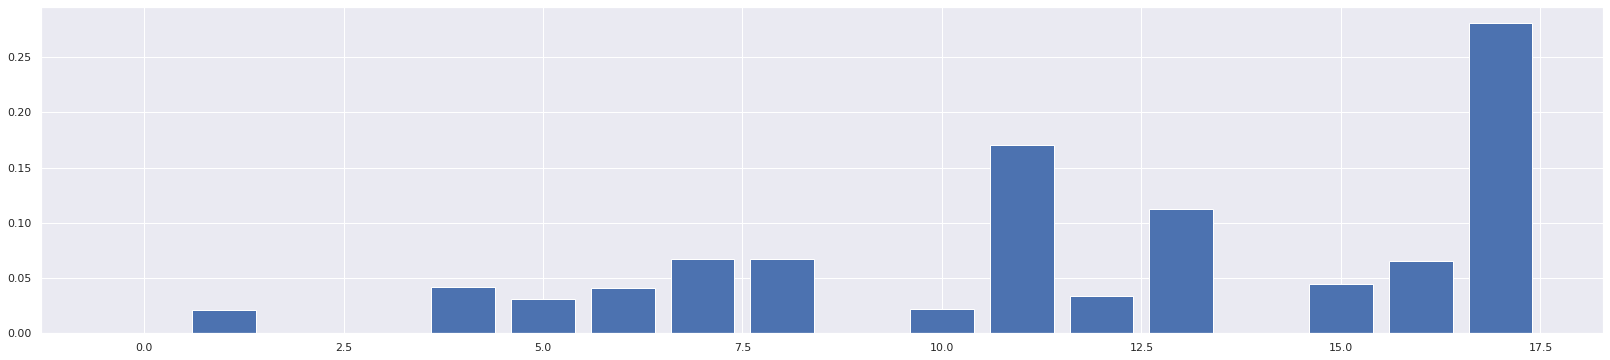

In [22]:
importance = tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

from matplotlib import pyplot

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [23]:
from xgboost import XGBClassifier

boost = XGBClassifier()
# Deploy train data and get score
boost.fit(X_train, Y_train)
boost.score(X_train, Y_train)

0.9953488372093023

In [24]:
# show confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, boost.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print(f'Model testing aaccuracy = {(TP+TN) / (TP+TN+FN+FP)}')

[[43  9]
 [13  7]]
Model testing aaccuracy = 0.6944444444444444


Feature: 0, Score: 0.04695
Feature: 1, Score: 0.05424
Feature: 2, Score: 0.04591
Feature: 3, Score: 0.02849
Feature: 4, Score: 0.04681
Feature: 5, Score: 0.04348
Feature: 6, Score: 0.04533
Feature: 7, Score: 0.04578
Feature: 8, Score: 0.05494
Feature: 9, Score: 0.04010
Feature: 10, Score: 0.08771
Feature: 11, Score: 0.05298
Feature: 12, Score: 0.04183
Feature: 13, Score: 0.07315
Feature: 14, Score: 0.03726
Feature: 15, Score: 0.04830
Feature: 16, Score: 0.05282
Feature: 17, Score: 0.15392


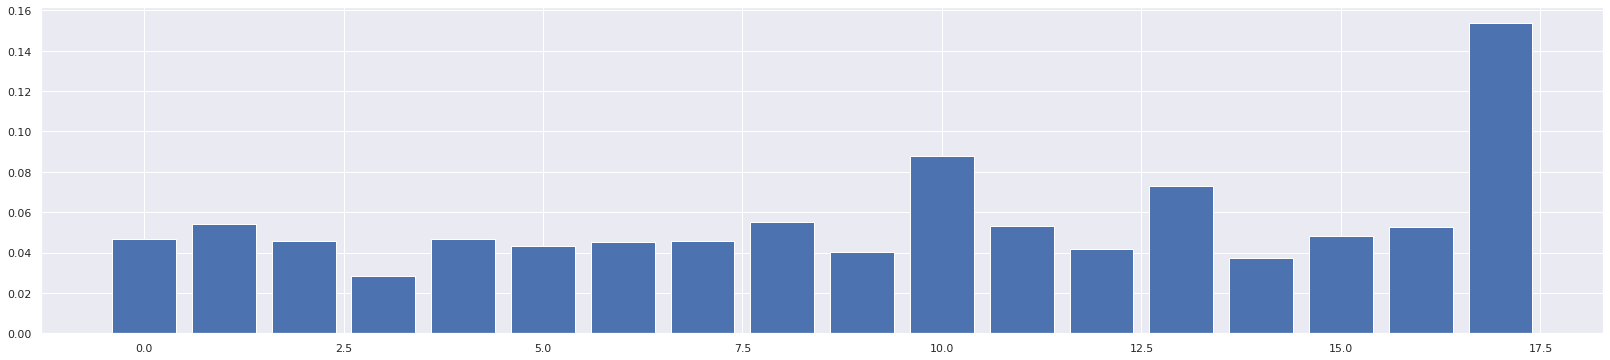

In [25]:
importance = boost.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [26]:
importance

array([0.04694998, 0.05423643, 0.04590594, 0.02849037, 0.04681288,
       0.04347627, 0.04532705, 0.04578329, 0.05494329, 0.04009829,
       0.0877087 , 0.05297728, 0.04183412, 0.07315229, 0.03725923,
       0.04830351, 0.05281994, 0.15392102], dtype=float32)